<a href="https://colab.research.google.com/github/arlou022/Kaggle-Titanic/blob/main/Kaggle_Titanic_ASPclassSibSpParch_ANN%2BEmbed_Cabin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

After many errors, observations and insights, I've decided to approach the Kaggle Titanic competition with an ANN which accepts as input the variables, Age, Sex, Pclass, SibSp, Parch and Cabin. 

The Age, Sex and Cabin variables are categorised with the Cabin category data being passed through an Embedding layer. The main reason I've decided to pass the Cabin category data through an embedding rather than just straight into the ANN, alongside the other variables, is because I experimented doing so and it wasn't leading to good results. Also, however, it sort of makes sense to vectorize the cabin as the cabin an individual was in determines where they were on the ship and their location on the ship would likely be a factor in their survival. 

Conclusions - I definitely could have processed the data better. For instance, in the training dataset there are 2 missing Embarked values; perhaps I could've analysed the data better to identify if the ticket or cabin data had any indication on where an individual embarked. There are also missing Fare data in the test set; I had a quick look and Pclass and Fare are very interlinked so I could have possibly substituted realistic values into those missing Fare points and processed the Fare variable as well.

Also, there are most likely better ML techniques and algorithms that I'm not aware of that are better suited for this problem. The next step is to look at other successful codes and learn why they're successful.

In [ ]:
# Code adapted from TF2.0_Loading_data_v3

from google.colab import files
uploaded = files.upload()

In [ ]:
# Code adapted from TF2.0 Loading in model test

!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
# imports

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Concatenate, Embedding, Dropout
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
dftrain = pd.read_csv('train.csv')

In [ ]:
dftrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Replace NaN with 0
dftrainclean = dftrain.fillna(0)

# https://www.geeksforgeeks.org/pandas-filling-nan-in-categorical-data/
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

In [ ]:
dftrainclean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Create new dataframe for all categorised variables.

Newdftrain = pd.DataFrame()

In [ ]:
# Categorise variable and translate variable into it's corresponding categorical data

dftrainclean.Sex = pd.Categorical(dftrainclean.Sex)
dftrainclean['New_Sex'] = dftrainclean.Sex.cat.codes
Newdftrain['New_Sex'] = dftrainclean.Sex.cat.codes

In [ ]:
# Categorise variable and translate variable into it's corresponding categorical data

dftrainclean.Age = pd.Categorical(dftrainclean.Age)
dftrainclean['New_Age'] = dftrainclean.Age.cat.codes
Newdftrain['New_Age'] = dftrainclean.Age.cat.codes

In [ ]:
# Categorise variable and translate variable into it's corresponding categorical data

dftrainclean.Cabin = pd.Categorical(dftrainclean.Cabin)
dftrainclean['New_Cabin'] = dftrainclean.Cabin.cat.codes
Newdftrain['New_Cabin'] = dftrainclean.Cabin.cat.codes

In [ ]:
dftrainclean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Sex,New_Age,New_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,1,29,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,52,82
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0,35,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,48,56
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,1,48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,1,36,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,25,31
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,35,61


In [ ]:
Newdftrain

,New_Sex,New_Age,New_Cabin
0,1,29,0
1,0,52,82
2,0,35,0
3,0,48,56
4,1,48,0
...,...,...,...
886,1,36,0
887,0,25,31
888,0,0,0
889,1,35,61


In [ ]:
Newdftrain[['Pclass','SibSp','Parch','Survived']] = dftrainclean[['Pclass','SibSp','Parch','Survived']] 

In [ ]:
Newdftrain

,New_Sex,New_Age,New_Cabin,Pclass,SibSp,Parch,Survived
0,1,29,0,3,1,0,0
1,0,52,82,1,1,0,1
2,0,35,0,3,0,0,1
3,0,48,56,1,1,0,1
4,1,48,0,3,0,0,0
...,...,...,...,...,...,...,...
886,1,36,0,2,0,0,0
887,0,25,31,1,0,0,1
888,0,0,0,3,1,2,0
889,1,35,61,1,0,0,1


In [ ]:
# Extract target values

survived = Newdftrain['Survived'].values
print(type(survived),survived.shape)

<class 'numpy.ndarray'> (891,)


In [ ]:
# Extract data

train_data = Newdftrain[['New_Sex','New_Age','Pclass','SibSp','Parch']].values 
print(type(train_data),train_data.shape)

Cabinarray = Newdftrain['New_Cabin'].values 
print(type(Cabinarray),Cabinarray.shape)

<class 'numpy.ndarray'> (891, 5)
<class 'numpy.ndarray'> (891,)


In [ ]:
# Split data

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val, Cabin_train, Cabin_val = train_test_split(train_data, survived, Cabinarray, test_size=0.4)

In [ ]:
print(x_train.shape,x_val.shape,y_train.shape,y_val.shape,Cabin_train.shape, Cabin_val.shape)

(534, 5) (357, 5) (534,) (357,) (534,) (357,)


In [ ]:
C = len(set(Cabinarray)) # no. of unique Cabins

In [ ]:
# Build model

# Hyperparameters
K = 3 # Embedding dimensionality

# Feature input
i = Input(shape=(x_train.shape[1],))

# Cabin input
c = Input(shape=(1,))

# User embedding
c_emb = Embedding(C,K) (c)

# Flatten embeddings
c_emb = Flatten()(c_emb) 

# Concatenate
x = Concatenate() ([i, c_emb])

#x = Dense(500, activation = 'relu') (i)
#x = Dropout(0.5) (x)
x = Dense(200, activation = 'relu') (x)
x = Dropout(0.25) (x)
x = Dense(100, activation = 'relu') (x)
x = Dropout(0.2) (x)
x = Dense(1,activation = 'sigmoid') (x) # binary classification problem

model = Model(inputs = [i,c], outputs = x)

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 1, 3)         444         ['input_6[0][0]']                
                                                                                                  
 input_5 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 flatten_2 (Flatten)            (None, 3)            0           ['embedding_2[0][0]']            
                                                                                            

In [ ]:
r = model.fit(
    x = [x_train,Cabin_train],
    y = y_train,
    validation_data = ([x_val,Cabin_val],y_val),
    epochs = 35,
    batch_size = 10
)

Epoch 1/35
54/54 [==============================] - 1s 7ms/step - loss: 1.0920 - accuracy: 0.5393 - val_loss: 0.6234 - val_accuracy: 0.7367
Epoch 2/35
54/54 [==============================] - 0s 4ms/step - loss: 0.7969 - accuracy: 0.5880 - val_loss: 0.6142 - val_accuracy: 0.6863
Epoch 3/35
54/54 [==============================] - 0s 4ms/step - loss: 0.7255 - accuracy: 0.6236 - val_loss: 0.6009 - val_accuracy: 0.6134
Epoch 4/35
54/54 [==============================] - 0s 6ms/step - loss: 0.6916 - accuracy: 0.5843 - val_loss: 0.6071 - val_accuracy: 0.6919
Epoch 5/35
54/54 [==============================] - 0s 5ms/step - loss: 0.6466 - accuracy: 0.6386 - val_loss: 0.6040 - val_accuracy: 0.6975
Epoch 6/35
54/54 [==============================] - 0s 4ms/step - loss: 0.6339 - accuracy: 0.6629 - val_loss: 0.6022 - val_accuracy: 0.7255
Epoch 7/35
54/54 [==============================] - 0s 4ms/step - loss: 0.6197 - accuracy: 0.6442 - val_loss: 0.5892 - val_accuracy: 0.7087
Epoch 8/35
54/54 [==

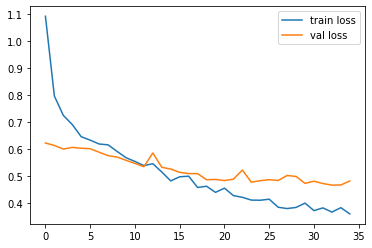

In [ ]:
# plot losses
plt.plot(r.history['loss'], label="train loss")
plt.plot(r.history['val_loss'], label="val loss")
plt.legend()

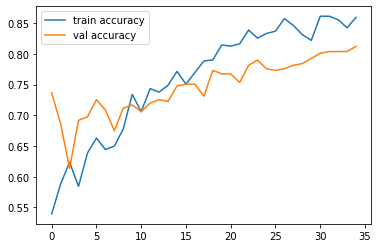

In [ ]:
# plot accuracy
plt.plot(r.history['accuracy'], label="train accuracy")
plt.plot(r.history['val_accuracy'], label="val accuracy")
plt.legend()

# Test data

In [ ]:
dftest = pd.read_csv('test.csv')

In [ ]:
dftest

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# Replace NaN with 0
dftestclean = dftest.fillna(0)

# https://www.geeksforgeeks.org/pandas-filling-nan-in-categorical-data/
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

In [ ]:
dftestclean

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.0500,0,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S
416,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.0500,0,S


In [ ]:
# Categorise sexes in test data wrt categories of sex in train data

sexcategories = dftrainclean.Sex.cat.categories
dftestclean.Sex = pd.Categorical(dftestclean.Sex, sexcategories)
dftestclean['New_Sex'] = dftestclean.Sex.cat.codes
dftestclean

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Sex
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.0500,0,S,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S,1
416,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.0500,0,S,1


In [ ]:
# Categorise ages in test data wrt categories of age in train data

# https://sparkbyexamples.com/pandas/pandas-replace-by-examples/#:~:text=DataFrame.,object%20and%20returns%20None%20value.

Agecategories = dftrainclean.Age.cat.categories
dftestclean.Age = pd.Categorical(dftestclean.Age, Agecategories)
dftestclean['New_Age'] = dftestclean.Age.cat.codes
dftestclean['New_Age'].replace(-1,0, inplace = True)
dftestclean
# some new values may not fit into old categories
# hence will lead to a NaN category, NaN leads to -1, so replace -1 with 0
# so it'll pass through the model as if age was unknown in the first place

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Sex,New_Age
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q,1,47
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S,0,63
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q,1,79
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S,1,36
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.0500,0,S,1,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,53
415,1307,3,"Saether, Mr. Simon Sivertsen",male,NaN,0,0,SOTON/O.Q. 3101262,7.2500,0,S,1,0
416,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.0500,0,S,1,0


In [ ]:
# Categorise cabin in test data wrt categories of cabin in train data

# https://sparkbyexamples.com/pandas/pandas-replace-by-examples/#:~:text=DataFrame.,object%20and%20returns%20None%20value.

Cabincategories = dftrainclean.Cabin.cat.categories
dftestclean.Cabin = pd.Categorical(dftestclean.Cabin, Cabincategories)
dftestclean['New_Cabin'] = dftestclean.Cabin.cat.codes
dftestclean['New_Cabin'].replace(-1,0, inplace = True)
dftestclean
# some new values may not fit into old categories
# hence will lead to  a NaN, NaN leads to -1, so replace -1 with 0
# so it'll pass through the model as if age was unknown in the first place

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Sex,New_Age,New_Cabin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q,1,47,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S,0,63,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q,1,79,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S,1,36,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S,0,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.0500,0,S,1,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,NaN,C,0,53,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,NaN,0,0,SOTON/O.Q. 3101262,7.2500,0,S,1,0,0
416,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.0500,0,S,1,0,0


In [ ]:
# Extract embed test data

testCabinarray = dftestclean['New_Cabin'].values 
print(type(testCabinarray),testCabinarray.shape)

<class 'numpy.ndarray'> (418,)


In [ ]:
# Extract remaining test data

test_data = dftestclean[['New_Sex','New_Age','Pclass','SibSp','Parch']].values 
print(type(test_data),test_data.shape)

<class 'numpy.ndarray'> (418, 5)


In [ ]:
predictions = model.predict([test_data,testCabinarray])

14/14 [==============================] - 1s 3ms/step


In [ ]:
print(type(predictions),predictions.shape)

<class 'numpy.ndarray'> (418, 1)


In [ ]:
results = np.round(predictions)

In [ ]:
testpassengers = dftest['PassengerId'].values

In [ ]:
dfresults = pd.DataFrame()

In [ ]:
dfresults['PassengerId'] = testpassengers

In [ ]:
dfresults['Survived'] = results

In [ ]:
dfresults = dfresults.astype(int)
# https://stackoverflow.com/questions/21291259/convert-floats-to-ints-in-pandas

In [ ]:
dfresults

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
dfresults.to_csv('Arlou_Kaggle_Titanic_ASPclassSibSpParch_ANN+Embed_Cabin_3.csv', index=False)

In [ ]:
!head Arlou_Kaggle_Titanic_ASPclassSibSpParch_ANN+Embed_Cabin_3.csv

PassengerId,Survived
892,0
893,1
894,0
895,0
896,0
897,0
898,1
899,0
900,0
